# 1.1 Exercise

Download the ```stroke``` dataset from eLearn@USM and build k-Nearest Neighbors classifier to classify the dataset. Use all attributes to build the classifier.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Import the dataset into IPython.

In [2]:
stroke = pd.read_csv('Stroke/stroke.csv')

In [3]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,31112,0,80.0,0,1,0,0,1,105.92,32.5,1,1
2,60182,1,49.0,0,0,0,0,0,171.23,34.4,2,1
3,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1
4,56669,0,81.0,0,0,0,0,0,186.21,29.0,0,1


As we can see there are 11 feature variables and 1 target variable.

Let's build a predictive model to classify the dataset. We split the dataset into training and test sets. A validation set is not created since we are building only one model.

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
seed_num = 10
y = stroke['stroke'].values
X = stroke.iloc[:,:11]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num)
print(X_train.shape)
print(X_test.shape)

(3927, 11)
(982, 11)


### 1.2 k-Nearest Neighbors Classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

Let's evaluate the performance of the model by predicting the test set.

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9531568228105907
[[936   5]
 [ 41   0]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       941
           1       0.00      0.00      0.00        41

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.95      0.94       982



Let's find the best value of k. We need to split the dataset into training, validation and test sets.

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed_num)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3141, 11)
(786, 11)
(982, 11)


In [8]:
scores = []
max_score = 0
best_k = 0
for k in range(1,15):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    score = model_knn.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_k = k
    scores.append(score)

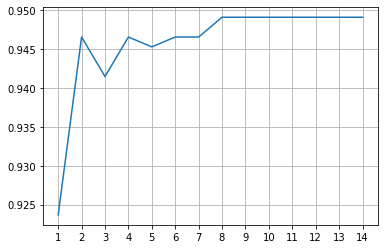

0.9491094147582697


In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(np.arange(1,15), scores)
plt.xticks(np.arange(1,15))
plt.grid()
plt.show()
print(max(scores))

In [10]:
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9582484725050916
[[941   0]
 [ 41   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       941
           1       0.00      0.00      0.00        41

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



We can also determine the value of ```k``` using cross validation. In this case, we split the dataset into training and test sets. Then we use ```cross_val_score``` to determine the ```k``` parameter. The training set will be partioned into ```cv``` parts.

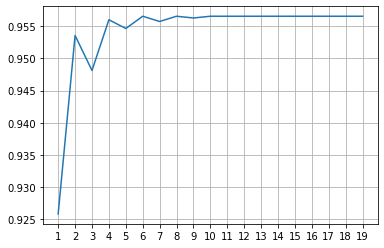

0.9565335378443749


In [11]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed_num)

scores = []
max_score = 0
best_k = 0
for k in range(1,20):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    score = cross_val_score(model_knn, X_train, y_train, cv=5)
    score = np.mean(score)
    if score > max_score:
        max_score = score
        best_k = k
    scores.append(score)

plt.plot(np.arange(1,20), scores)
plt.xticks(np.arange(1,20))
plt.grid()
plt.show()
print(max(scores))

In [12]:
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9592833876221498
[[1178    1]
 [  49    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



### 1.3 Perceptron Classifier

In [13]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,31112,0,80.0,0,1,0,0,1,105.92,32.5,1,1
2,60182,1,49.0,0,0,0,0,0,171.23,34.4,2,1
3,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1
4,56669,0,81.0,0,0,0,0,0,186.21,29.0,0,1


As we can see there are 11 feature variables and 1 target variable. 

Let's build a predictive model to classify the dataset. We split the dataset into training and test_sets. A validation set is not created since we are building only one model.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed_num)
print(X_train.shape)

(3681, 11)


In [15]:
from sklearn.linear_model import SGDClassifier
model_pcpt = SGDClassifier(loss='perceptron', eta0=1, learning_rate='constant', penalty=None, max_iter=200, random_state=seed_num)
model_pcpt.fit(X_train, y_train)

SGDClassifier(eta0=1, learning_rate='constant', loss='perceptron', max_iter=200,
              penalty=None, random_state=10)

Let's evaluate the performance of the model by predicting the test set.

In [16]:
y_pred = model_pcpt.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9600977198697068
[[1179    0]
 [  49    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228

